# **ANALISIS SENTIMEN TERHADAP FILM KKN DI DESA PENARI**

**Business Understanding**: KKN di Desa Penari merupakan film horor yang menceritakan berbagai kejadian mistis yang dialami enam mahasiswa ketika menjalani KKN di sebuah desa terpencil. Film ini menyedot antusias masyarakat Indonesia dengan meraih 2 juta penonton hanya dalam kurun waktu 6 hari penayangan. Berbagai opini diberikan setelah menonton film tersebut, baik positif, netral, maupun negatif. Opini yang diberikan dapat memberikan insight dan menjadi salah satu pertimbangan dalam kebijakan penayangan dan produksi untuk sekuel berikutnya.

**Notable Skills**: Business Accumen, Crawling Data, Data Analysis, NLTK, Python

**Purpose**: menganalisis bagaimana opini terhadap film "KKN di Desa Penari" pada masa awal penayangan di bioskop

**Business Benefit**: Mengetahui tanggapan masyarakat Indonesia terhadap film "KKN di Desa Penari", sehingga dapat digunakan sebagai salah satu bahan pertimbangan televisi Indonesia dalam menayangkan film tersebut ke layar televisi.

In [ ]:
#Clone Tweet Harvest untuk Crawling Data

!pip install pandas
!curl -sL https://deb.nodesource.com/setup_18.x | sudo -E bash -
!sudo apt-get install -y nodejs

In [3]:
#Import Modul & Library yang dibutuhkan

import re
from textblob import TextBlob
import datetime as DT
import yfinance as yf
import matplotlib.pyplot as plt
import numpy

In [ ]:
# Crawl Data 15 hari penayangan awal

filename = 'KKN_Di_Desa_Penari.csv'
search_keyword = 'KKN di Desa Penari lang:in until:2022-05-15 since:2022-04-30'
limit = 700

!npx --yes tweet-harvest@latest -o "{filename}" -s "{search_keyword}" -l {limit} --token ""

In [5]:
import pandas as pd

# Specify the path to your CSV file
file_path = f"tweets-data/{filename}"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path, delimiter=";")

# Display the DataFrame
display(df)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Sat May 14 23:49:52 +0000 2022,1525624465920753664,Kkn di desa penari. ⭐️⭐️⭐️⭐️⭐️,0,1,0,0,in,305567373,1525624465920753664,ninaroselan,https://twitter.com/ninaroselan/status/1525624...
1,Sat May 14 23:47:03 +0000 2022,1525623758307831808,Emil Dardak akui beberapa kali terkejut saksik...,0,0,0,1,in,18071520,1525623758307831808,antaranews,https://twitter.com/antaranews/status/15256237...
2,Sat May 14 23:42:07 +0000 2022,1525622517989158912,Pengin nonton KKN di Desa Penari. Tapi ga bera...,0,0,0,0,in,1552591962,1525622517989158912,ansnyrtrrswh97,https://twitter.com/ansnyrtrrswh97/status/1525...
3,Sat May 14 23:19:36 +0000 2022,1525616850910195713,Film KKN di Desa Penari Sudah Ditonton Lebih 2...,0,0,0,1,in,1236356576417468416,1525616850910195713,semarakredaksi,https://twitter.com/semarakredaksi/status/1525...
4,Sat May 14 23:15:17 +0000 2022,1525615763566268416,Cerita Asli KKN di Desa Penari versi Nur dan W...,0,0,20,65,in,944845680408895488,1525615763566268416,infopenanews,https://twitter.com/infopenanews/status/152561...
...,...,...,...,...,...,...,...,...,...,...,...,...
704,Fri May 13 23:35:04 +0000 2022,1525258354552999938,"Reaksi Nonton KKN di Desa Penari, Setan yang T...",0,0,0,0,in,155169715,1525258354552999938,soloposdotcom,https://twitter.com/soloposdotcom/status/15252...
705,Fri May 13 23:27:55 +0000 2022,1525256554777178113,nak tgk cerita kkn di desa penari tpi pkul 6 ...,0,0,0,0,in,946086850136903685,1525256554777178113,nsamz30,https://twitter.com/nsamz30/status/15252565547...
706,Fri May 13 23:27:19 +0000 2022,1525256404600115200,film KKN di Desa Penari ternyata bagus,0,1,0,0,in,344748244,1525256404600115200,seventhpm,https://twitter.com/seventhpm/status/152525640...
707,Fri May 13 23:24:47 +0000 2022,1525255765560160256,"Yang abis nnton KKN Desa Penari, pada spoiler ...",0,0,0,0,in,1264775821455052800,1525255765560160256,Maynarr8,https://twitter.com/Maynarr8/status/1525255765...


**DATA UNDERSTANDING**

Crawling data menghasilkan data sebanyak 709 data tweet dengan rentang postingan antara tanggal 30 April sampai 15 Mei 2022. Rentang ini dipilih untuk melihat opini masyarakat pada 2 minggu pertama setelah film tayang. Hasil crawling data dibentuk sebuah dataframe yang terdiri dari beberapa kolom berikut:
1. Created at : tanggal tweet diposting
2. id_str : id unik untuk masing-masing tweet
3. full_text : isi tweet
4. quote_count : menunjukkan berapa kali tweet tersebut telah dikutip oleh pengguna Twitter lainnya
5. reply_count : jumlah reply untuk tweet
6. retweet_count : jumlah retweet untuk tweet
7. favorite_count : jumlah like untuk tweet
8. lang : bahasa yang digunakan pada tweet
9. user_id_str : ID unik untuk pengguna
10. conversation_id_str : ID unik dari percakapan dalam tweet
11. username : nama pengguna
12. tweet_URL : link tweet

Mengambil kolom tanggal tweet di posting dan isi dari tweet

In [6]:
data = pd.DataFrame(df[['created_at', 'full_text']])
data

,created_at,full_text
0,Sat May 14 23:49:52 +0000 2022,Kkn di desa penari. ⭐️⭐️⭐️⭐️⭐️
1,Sat May 14 23:47:03 +0000 2022,Emil Dardak akui beberapa kali terkejut saksik...
2,Sat May 14 23:42:07 +0000 2022,Pengin nonton KKN di Desa Penari. Tapi ga bera...
3,Sat May 14 23:19:36 +0000 2022,Film KKN di Desa Penari Sudah Ditonton Lebih 2...
4,Sat May 14 23:15:17 +0000 2022,Cerita Asli KKN di Desa Penari versi Nur dan W...
...,...,...
704,Fri May 13 23:35:04 +0000 2022,"Reaksi Nonton KKN di Desa Penari, Setan yang T..."
705,Fri May 13 23:27:55 +0000 2022,nak tgk cerita kkn di desa penari tpi pkul 6 ...
706,Fri May 13 23:27:19 +0000 2022,film KKN di Desa Penari ternyata bagus
707,Fri May 13 23:24:47 +0000 2022,"Yang abis nnton KKN Desa Penari, pada spoiler ..."


**PREPROCESSING DATA**

In [7]:
#Membuat fungsi untuk Menghapus mention username

import numpy as np

def remove_pattern(input_txt, pattern):
  r = re.findall(pattern, input_txt)
  for i in r:
    input_txt = re.sub(i, '', input_txt)
  return input_txt

In [8]:
#Menghapus @user
data['clean_tweet'] = np.vectorize(remove_pattern)(data['full_text'], "@[\w]*")
data

,created_at,full_text,clean_tweet
0,Sat May 14 23:49:52 +0000 2022,Kkn di desa penari. ⭐️⭐️⭐️⭐️⭐️,Kkn di desa penari. ⭐️⭐️⭐️⭐️⭐️
1,Sat May 14 23:47:03 +0000 2022,Emil Dardak akui beberapa kali terkejut saksik...,Emil Dardak akui beberapa kali terkejut saksik...
2,Sat May 14 23:42:07 +0000 2022,Pengin nonton KKN di Desa Penari. Tapi ga bera...,Pengin nonton KKN di Desa Penari. Tapi ga bera...
3,Sat May 14 23:19:36 +0000 2022,Film KKN di Desa Penari Sudah Ditonton Lebih 2...,Film KKN di Desa Penari Sudah Ditonton Lebih 2...
4,Sat May 14 23:15:17 +0000 2022,Cerita Asli KKN di Desa Penari versi Nur dan W...,Cerita Asli KKN di Desa Penari versi Nur dan W...
...,...,...,...
704,Fri May 13 23:35:04 +0000 2022,"Reaksi Nonton KKN di Desa Penari, Setan yang T...","Reaksi Nonton KKN di Desa Penari, Setan yang T..."
705,Fri May 13 23:27:55 +0000 2022,nak tgk cerita kkn di desa penari tpi pkul 6 ...,nak tgk cerita kkn di desa penari tpi pkul 6 ...
706,Fri May 13 23:27:19 +0000 2022,film KKN di Desa Penari ternyata bagus,film KKN di Desa Penari ternyata bagus
707,Fri May 13 23:24:47 +0000 2022,"Yang abis nnton KKN Desa Penari, pada spoiler ...","Yang abis nnton KKN Desa Penari, pada spoiler ..."


In [9]:
pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.6/356.6 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.6.0-py2.py3-none-any.whl size=351311 sha256=fa0d1e605659db6a8a559183b1a76925ff08269e3d809db1d69d5238038ef809
  Stored in directory: /root/.cache/pip/wheels/ea/0b/64/114bc939d0083621aa41521e21be246c888260b8aa21e6c1ad
Successfully built emoji


In [10]:
from os.path import join
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import string
import emoji

#Fungsi untuk Menghapus karakter karakter tertentu dan ubah jadi lowercase semua
def clean_tweet(tweet):
  tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
  return tweet_bersih.lower()

#Fungsi untuk menghapus semua spasi ekstra dan mengembalikannya dalam bentuk string
def remove_whitespace(tweet):
  return ' '. join(tweet.split())

#Fungsi untuk tokenizing
def tokenizing(tweet):
    tokens = word_tokenize(tweet)
    return ' '.join(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [11]:
data['clean_bersih'] = data['clean_tweet'].apply(clean_tweet)
data['clean_bersih'] = data['clean_bersih'].apply(remove_whitespace)
data['clean_bersih'] = data['clean_bersih'].apply(tokenizing)
data

,created_at,full_text,clean_tweet,clean_bersih
0,Sat May 14 23:49:52 +0000 2022,Kkn di desa penari. ⭐️⭐️⭐️⭐️⭐️,Kkn di desa penari. ⭐️⭐️⭐️⭐️⭐️,kkn di desa penari
1,Sat May 14 23:47:03 +0000 2022,Emil Dardak akui beberapa kali terkejut saksik...,Emil Dardak akui beberapa kali terkejut saksik...,emil dardak akui beberapa kali terkejut saksik...
2,Sat May 14 23:42:07 +0000 2022,Pengin nonton KKN di Desa Penari. Tapi ga bera...,Pengin nonton KKN di Desa Penari. Tapi ga bera...,pengin nonton kkn di desa penari tapi ga beran...
3,Sat May 14 23:19:36 +0000 2022,Film KKN di Desa Penari Sudah Ditonton Lebih 2...,Film KKN di Desa Penari Sudah Ditonton Lebih 2...,film kkn di desa penari sudah ditonton lebih 2...
4,Sat May 14 23:15:17 +0000 2022,Cerita Asli KKN di Desa Penari versi Nur dan W...,Cerita Asli KKN di Desa Penari versi Nur dan W...,cerita asli kkn di desa penari versi nur dan w...
...,...,...,...,...
704,Fri May 13 23:35:04 +0000 2022,"Reaksi Nonton KKN di Desa Penari, Setan yang T...","Reaksi Nonton KKN di Desa Penari, Setan yang T...",reaksi nonton kkn di desa penari setan yang ti...
705,Fri May 13 23:27:55 +0000 2022,nak tgk cerita kkn di desa penari tpi pkul 6 ...,nak tgk cerita kkn di desa penari tpi pkul 6 ...,nak tgk cerita kkn di desa penari tpi pkul 6 l...
706,Fri May 13 23:27:19 +0000 2022,film KKN di Desa Penari ternyata bagus,film KKN di Desa Penari ternyata bagus,film kkn di desa penari ternyata bagus
707,Fri May 13 23:24:47 +0000 2022,"Yang abis nnton KKN Desa Penari, pada spoiler ...","Yang abis nnton KKN Desa Penari, pada spoiler ...",yang abis nnton kkn desa penari pada spoiler d...


In [12]:
pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 8.5 MB/s eta 0:00:00


In [13]:
#Hapus Kata Tidak Penting

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
more_stopword = ['leuwigoong', 'lt', 'tbh', 'anjir', 'uwu', 'wkkk', 'kur', 'ba', 'ny', 'ihh', 'hmm', 'hahahahahahaahhahaahsh', 'hahahhahahahahaj', 'ewe', 'kinnporscheep6', 'wkwkwkwkkwkwk', 'ngew', 'jap', 'zonauang', 'zonaba','zonajajan', 'wkwk', 'kwkwkw', 'sksksk']
stopword = factory.create_stop_word_remover()
stopwords = factory.get_stop_words()+more_stopword
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [14]:
def MenghapusKata(tweet):
  clean_list = [word for word in tweet.split() if word not in stopwords]
  return clean_list

pd.set_option('display.max_rows', None)

tweet_hapus = data['clean_bersih'].apply(MenghapusKata)
print(tweet_hapus)

0                                    [kkn, desa, penari]
1      [emil, dardak, akui, beberapa, kali, terkejut,...
2      [pengin, nonton, kkn, desa, penari, ga, berani...
3      [film, kkn, desa, penari, ditonton, lebih, 2, ...
4      [cerita, asli, kkn, desa, penari, versi, nur, ...
5      [kapaan, gue, nonnton, kkn, desa, penari, gak,...
6      [lagian, orang2, nih, nyari, kejelekan, film, ...
7      [kkn, desa, penari, sukses, coming, soon, semp...
8      [open, booked, for, war, kalau, memang, tayang...
9      [hi, guys, info, aja, katanya, kkn, desa, pena...
10     [ni, kayanya, produser, kkn, desa, penari, kul...
11                  [penasaran, sama, kkn, desa, penari]
12     [kkn, desa, penari, apocalypse, kkn, desa, pen...
13     [local, culture, bahasa, halus, kkn, bukan, kk...
14     [kkn, desa, penari, kkn, desa, penari, uncut, ...
15     [biodata, agama, aghniny, haque, pemeran, ayu,...
16     [biodata, agama, aulia, sarah, pemeran, badara...
17     [btw, gimana, ye, ntn, k

In [15]:
#Stemming : Mencari kata dasar

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stem_say = factory.create_stemmer()

def stemmed_wrapper(term):
  return stem_say.stem(term)

term_base = {}

for document in tweet_hapus:
  for term in document:
    if term not in term_base:
      term_base[term] = " "

print(len(term_base))
print("---------------------------")

for term in term_base:
  term_base[term] = stemmed_wrapper(term)
  print(term,":" ,term_base[term])

print(term_base)
print("---------------------------")

def get_stemmed_term(document):
  return [term_base[term] for term in document]

stem_done = tweet_hapus.apply(get_stemmed_term)

print(stem_done)

2794
---------------------------
kkn : kkn
desa : desa
penari : tari
emil : emil
dardak : dardak
akui : aku
beberapa : beberapa
kali : kali
terkejut : kejut
saksikan : saksi
pengin : pengin
nonton : nonton
ga : ga
berani : berani
kalo : kalo
sendirian : sendiri
film : film
ditonton : tonton
lebih : lebih
2 : 2
juta : juta
orang : orang
kalahkan : kalah
doctor : doctor
strange2 : strange2
in : in
multivers : multivers
of : of
madness : madness
cerita : cerita
asli : asli
versi : versi
nur : nur
widya : widya
thread : thread
twitter : twitter
kkndidesapenari : kkndidesapenari
bima : bima
kapaan : kapa
gue : gue
nonnton : nonnton
gak : gak
sunat : sunat
lagian : lagi
orang2 : orang2
nih : nih
nyari : nyari
kejelekan : jelek
kok : kok
segitunya : segitunya
gitu : gitu
loh : loh
gk : gk
habis : habis
pikir : pikir
sukses : sukses
coming : coming
soon : soon
sempro : sempro
open : open
booked : booked
for : for
war : war
kalau : kalau
memang : memang
tayang : tayang
penayangan : tayang
tau :

In [16]:
data['stem_done'] = stem_done
all_text = data['stem_done'].apply(lambda x: ' '.join(x))
print(all_text)

0                                          kkn desa tari
1      emil dardak aku beberapa kali kejut saksi kkn ...
2      pengin nonton kkn desa tari ga berani kalo sen...
3      film kkn desa tari tonton lebih 2 juta orang k...
4      cerita asli kkn desa tari versi nur widya thre...
5               kapa gue nonnton kkn desa tari gak sunat
6      lagi orang2 nih nyari jelek film kkn desa tari...
7      kkn desa tari sukses coming soon sempro desa tari
8      open booked for war kalau memang tayang tayang...
9      hi guys info aja kata kkn desa tari bakal yg v...
10     ni kaya produser kkn desa tari kuliah kampus g...
11                          penasaran sama kkn desa tari
12     kkn desa tari apocalypse kkn desa tari into th...
13     local culture bahasa halus kkn bukan kkn desa ...
14     kkn desa tari kkn desa tari uncut kkn desa tar...
15     biodata agama aghniny haque per ayu film kkn d...
16     biodata agama aulia sarah per badarawuhi film ...
17        btw gimana ye ntn kkn

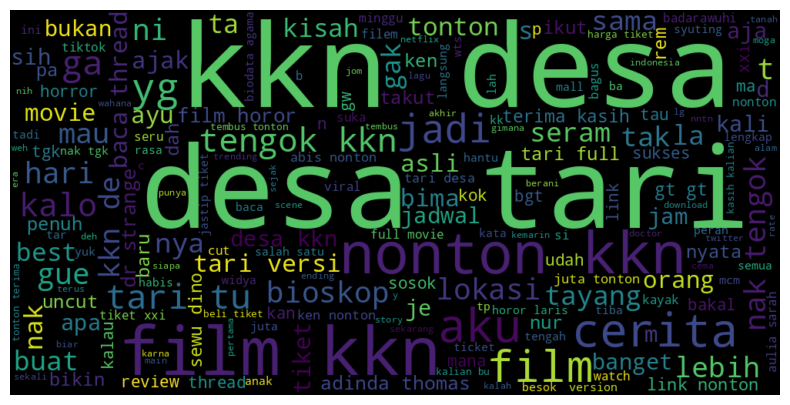

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Mengonversi objek menjadi string
all_text = str(all_text)

# Membuat WordCloud untuk sentimen positif
wordcloud = WordCloud(width=1000, height=500, max_font_size=150, random_state=42).generate(all_text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [18]:
data['all_text_clean'] = data['stem_done'].apply(lambda x: ' '.join(x))

**ANALISIS SENTIMEN**

In [19]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [20]:
from nltk.sentiment import SentimentIntensityAnalyzer

#Menginisialisasi SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

#Menghitung sentimen untuk setiap ulasan
data['sentimen'] = data['all_text_clean'].apply(lambda x: sia.polarity_scores(x)['compound'])

#Melabeli sentimen berdasarkan nilai sentimen
data['sentimen_label'] = data['sentimen'].apply(lambda x: 'positif' if x > 0 else ('negatif' if x < 0 else 'netral'))


In [21]:
data[['full_text', 'sentimen', 'sentimen_label']].head(10)

,full_text,sentimen,sentimen_label
0,Kkn di desa penari. ⭐️⭐️⭐️⭐️⭐️,0.0000,netral
1,Emil Dardak akui beberapa kali terkejut saksik...,0.0000,netral
2,Pengin nonton KKN di Desa Penari. Tapi ga bera...,0.0000,netral
3,Film KKN di Desa Penari Sudah Ditonton Lebih 2...,-0.4404,negatif
4,Cerita Asli KKN di Desa Penari versi Nur dan W...,0.0000,netral
5,Kapaan gue bisa nonnton kkn di desa penari gak...,0.0000,netral
6,Lagian ya orang2 nih nyari kejelekan film kkn ...,0.0000,netral
7,Kkn di desa penari sukses. Coming soon sempro ...,0.0000,netral
8,Open booked for war nanti kalau memang sudah t...,-0.8720,negatif
9,"Hi guys, info aja. Katanya KKN di Desa Penari ...",0.0000,netral


In [22]:
data.to_csv("hasil ulasan", index = False, encoding='utf-8')

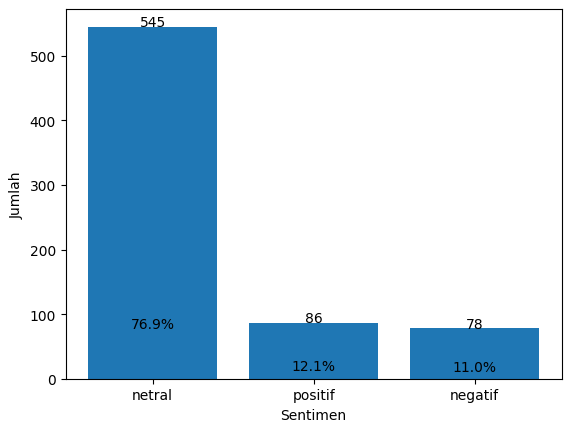

In [23]:
import matplotlib.pyplot as plt

# Menghitung jumlah setiap nilai dalam kolom 'sentimen'
sentimen_counts = data['sentimen_label'].value_counts()

# Menghitung persentase setiap label
sentimen_percentages = sentimen_counts / sentimen_counts.sum() * 100

# Membuat bar chart
plt.bar(sentimen_counts.index, sentimen_counts.values)

# Menampilkan angka absolut pada bar chart
for i, value in enumerate(sentimen_counts.values):
    plt.text(i, value + 1, str(value), ha='center')

# Menampilkan persentase pada bar chart
for i, value in enumerate(sentimen_percentages):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center')

# Memberi judul pada sumbu x dan y
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')

# Menampilkan bar chart
plt.show()

Sentimen netral terbanyak. Sentimen positif lebih banyak daripada sentimen negatif yang berarti banyak respon positif dari penonton setelah menonton film KKN di Desa Penari. Namun, gap antara sentimen positif dan sentimen negatif tidak berbeda jauh. Hal ini dapat menjadi salah satu bahan pertimbangan dalam kebijakan penayangan atau pembuatan sekuel film selanjutnya